OBSERVATIONS

1) Although urban rides over-index in volume, it has the lowest average fare.
2) Majority (80.9%) of the drivers cater to urban city types.
3) Despite accounting for only 2.6% of drivers by city types, Rural city type drives make up 6.8% of total fares.


In [50]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
#city data = city,driver_count,type
ride_data = pd.read_csv(ride_data_to_load)
#ride data = city,date,fare,ride_id

# Combine the data into a single dataset
merged_data = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
merged_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

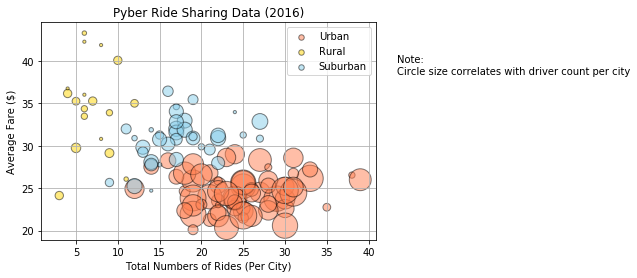

In [51]:
# Obtain the x and y coordinates for each of the three city types
urban = merged_data[merged_data["type"] == "Urban"].groupby([merged_data["city"]])
rural = merged_data[merged_data["type"] == "Rural"].groupby([merged_data["city"]])
suburb = merged_data[merged_data["type"] == "Suburban"].groupby([merged_data["city"]])
# Build the scatter plots for each city types

#URBAN 
urban_total_rides = urban["ride_id"].count()
urban_avg_fare = urban["fare"].mean()
urban_driver_count = urban["driver_count"].mean()

urban_scatter = plt.scatter(urban_total_rides, urban_avg_fare, label = "Urban", s=urban_driver_count * 10, 
            color=["coral"], edgecolor="black", alpha = 0.5, marker="o")

#RURAL
rural_total_rides = rural["ride_id"].count()
rural_avg_fare = rural["fare"].mean()
rural_driver_count = rural["driver_count"].mean()

rural_scatter = plt.scatter(rural_total_rides, rural_avg_fare, label = "Rural", s=rural_driver_count * 10, 
            color=["gold"], edgecolor="black", alpha = 0.5, marker="o")

#SUBURB
suburb_total_rides = suburb["ride_id"].count()
suburb_avg_fare = suburb["fare"].mean()
suburb_driver_count = suburb["driver_count"].mean()

suburb_scatter = plt.scatter(suburb_total_rides, suburb_avg_fare, label = "Suburban", s=suburb_driver_count * 10, 
            color=["skyblue"], edgecolor="black", alpha = 0.5, marker="o")

# Incorporate the other graph properties
#add grid
plt.grid()
#axis titles
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Numbers of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
legend = plt.legend(handles=[urban_scatter, rural_scatter,suburb_scatter], loc="best")
#size of legend handles is off
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]  #fixed!

# Incorporate a text label regarding circle size
annotation = "Note:\nCircle size correlates with driver count per city"
plt.gcf().text(0.95, 0.7, annotation, fontsize=10)

# Save Figure
plt.savefig("Images/PyberRideSharingData.png", bbox_inches="tight")

#show
plt.show()


## Total Fares by City Type

<function matplotlib.pyplot.show(*args, **kw)>

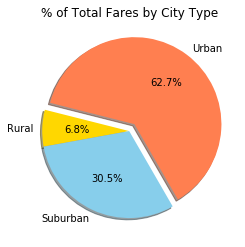

In [52]:
# Calculate Type Percents
#URBAN
only_urban = merged_data.loc[merged_data["type"] == "Urban", :]
urban_fare_total = only_urban['fare'].sum()

#RURAL
only_rural = merged_data.loc[merged_data["type"] == "Rural", :]
rural_fare_total = only_rural['fare'].sum()

#SUBURBAN
only_suburban = merged_data.loc[merged_data["type"] == "Suburban", :]
suburban_fare_total = only_suburban['fare'].sum()

#calculations
tot_fare = urban_fare_total + rural_fare_total + suburban_fare_total
urban_perc = urban_fare_total/tot_fare
rural_perc = rural_fare_total/tot_fare
suburban_perc = suburban_fare_total/tot_fare

# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
sizes = [urban_perc,rural_perc,suburban_perc]
colors = ["coral","gold", "skyblue"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=300)

#title
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/TotalFaresbyCityTypes.png", bbox_inches="tight")

#show
plt.show


## Total Rides by City Type

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  from ipykernel import kernelapp as app


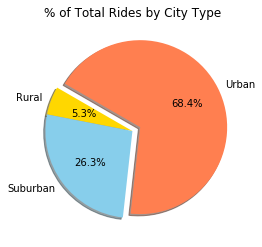

In [53]:
# Calculate Ride Percents

type_city = merged_data.groupby('type')
count_type = pd.DataFrame(type_city['type'].count())
count_type

# Build Pie Chart
#beautify dat chart
labels = ["Rural", "Suburban", "Urban"]
sizes = [count_type["type"]]
colors = ["gold", "skyblue", "coral"]
explode = (0, 0.0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=150)

#title
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/TotalRidesByCityType.png", bbox_inches="tight")

#show
plt.show()


## Total Drivers by City Type

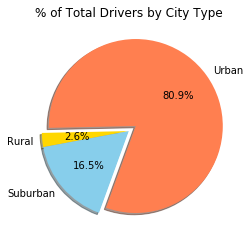

In [54]:
# Calculate Driver Percents
#URBAN - use city_data csv instead of merged**
only_urban_driver = city_data.loc[city_data["type"] == "Urban", :]
urban_driver_count = only_urban_driver['driver_count'].sum()

#RURAL - use city_data csv instead of merged**
only_rural_driver = city_data.loc[city_data["type"] == "Rural", :]
rural_driver_count = only_rural_driver['driver_count'].sum()

#SUBURBAN - use city_data csv instead of merged**
only_suburban_driver = city_data.loc[city_data["type"] == "Suburban", :]
suburban_driver_count = only_suburban_driver['driver_count'].sum()

#calculations
tot_driver_count = urban_driver_count + rural_driver_count + suburban_driver_count
urban_perc_driver = urban_driver_count/tot_driver_count
rural_perc_driver = rural_driver_count/tot_driver_count
suburban_perc_driver = suburban_driver_count/tot_driver_count

# Build Pie Charts

# # Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]
sizes = [urban_perc_driver,rural_perc_driver,suburban_perc_driver]
colors = ["coral","gold", "skyblue"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)

#title
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/TotalDriverbyCityType.png", bbox_inches="tight")

#show
plt.show()
